## Performance Assesment of Trained Models

This notebook performs a performance assesment of the models trained and saved as h5py files.

Imports :

In [75]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.layers import Input
from keras import activations
from keras.models import load_model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import initializers
from keras.models import Sequential, Model

from keras.applications import imagenet_utils 
import numpy as np

import h5py as h5py

from __future__ import division

from vis.visualization import visualize_activation,visualize_saliency,overlay,visualize_cam
from vis.utils import utils

### Model Architecture :


Attention : model architecture should be the same as the one the network was trained on. Particularly, 

version 1 : only one dense layer at the top

version 2 : two dense layers at the top (1024 neurons in the second one)


In [2]:
base_model = InceptionV3(weights='imagenet',include_top=False,input_shape = (250, 400, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)

#Only for version 2:
x = Dense(1024, activation='relu',kernel_initializer=initializers.VarianceScaling(scale=2.0))(x)

# and a logistic layer
predictions = Dense(1, activation='sigmoid',kernel_initializer=initializers.VarianceScaling(scale=2.0))(x)

model= Model(inputs=base_model.input, outputs=predictions)

### Load Model Weights

In [3]:
model.load_weights("Inceptionv3_2.h5")

### We first pass the Clean test images through our models
The False Positive Rate is then printed.

In [7]:
#Performance Assesment : 
import os

#For Clean Cars : 
root_path="../PICS/testnew/"
direc="Clean/"
pred_sum=0
for pic in os.listdir(root_path+direc):
    img = image.load_img(root_path+direc+pic, target_size=(250,400))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    preds = int(round(model.predict(img)))
    pred_sum+=preds
print("False Positive Rate :")
print(pred_sum/len(os.listdir(root_path+direc)))

False Positive Rate :
0.168458781362


### We then forward the Damaged test images and print the Detection Rate (1-False Negative Rate)

In [9]:
#For Damaged Cars : 
root_path="../PICS/testnew/"
direc="Damaged/"
pred_sum=0
idx=1
for pic in os.listdir(root_path+direc):
    img = image.load_img(root_path+direc+pic, target_size=(250,400))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    preds = int(round(model.predict(img)))
    pred_sum+=preds
    print(pic)
    print(preds)
    print(pred_sum/idx)
    idx+=1
print("Detection Rate :")
print(pred_sum/len(os.listdir(root_path+direc)))

DD1.jpg
1
1.0
DD10.jpg
1
1.0
DD101.jpg
1
1.0
DD103.jpg
1
1.0
DD104.jpg
0
0.8
DD107.jpg
1
0.833333333333
DD109.jpg
1
0.857142857143
DD11.jpg
1
0.875
DD112.jpg
1
0.888888888889
DD114.jpg
1
0.9
DD116.jpg
1
0.909090909091
DD117.jpg
1
0.916666666667
DD119.jpg
1
0.923076923077
DD12.jpg
1
0.928571428571
DD124.jpg
1
0.933333333333
DD125.jpg
1
0.9375
DD129.jpg
1
0.941176470588
DD130.jpg
0
0.888888888889
DD132.jpg
1
0.894736842105
DD133.jpg
1
0.9
DD134.jpg
1
0.904761904762
DD136.jpg
1
0.909090909091
DD137.jpg
1
0.913043478261
DD138.jpg
1
0.916666666667
DD139.jpg
1
0.92
DD14.jpg
1
0.923076923077
DD140.jpg
1
0.925925925926
DD143.jpg
1
0.928571428571
DD144.jpg
1
0.931034482759
DD145.jpg
1
0.933333333333
DD148.jpg
1
0.935483870968
DD149.jpg
1
0.9375
DD15.jpg
1
0.939393939394
DD151.jpg
0
0.911764705882
DD154.jpg
1
0.914285714286
DD155.jpg
1
0.916666666667
DD156.jpg
1
0.918918918919
DD157.jpg
1
0.921052631579
DD158.jpg
1
0.923076923077
DD159.jpg
1
0.925
DD16.jpg
0
0.90243902439
DD160.jpg
1
0.904761904

DD523.jpg
0
0.800632911392
DD524.jpg
1
0.801261829653
DD525.jpg
1
0.801886792453
DD526.jpg
1
0.802507836991
DD528.jpg
1
0.803125
DD529.jpg
1
0.803738317757
DD53.jpg
1
0.804347826087
DD530.jpg
1
0.804953560372
DD531.jpg
1
0.805555555556
DD534.jpg
1
0.806153846154
DD535.jpg
1
0.806748466258
DD536.jpg
1
0.807339449541
DD537.jpg
1
0.807926829268
DD539.jpg
1
0.808510638298
DD54.jpg
1
0.809090909091
DD540.jpg
0
0.80664652568
DD542.jpg
1
0.807228915663
DD543.jpg
0
0.804804804805
DD544.jpg
1
0.805389221557
DD546.jpg
1
0.805970149254
DD547.jpg
1
0.806547619048
DD548.jpg
1
0.807121661721
DD549.jpg
1
0.807692307692
DD55.jpg
1
0.808259587021
DD551.jpg
1
0.808823529412
DD552.jpg
1
0.809384164223
DD556.jpg
1
0.809941520468
DD558.jpg
0
0.807580174927
DD559.jpg
1
0.808139534884
DD56.jpg
1
0.808695652174
DD560.jpg
0
0.806358381503
DD561.jpg
1
0.806916426513
DD562.jpg
1
0.807471264368
DD563.jpg
1
0.808022922636
DD564.jpg
1
0.808571428571
DD566.jpg
1
0.809116809117
DD567.jpg
1
0.809659090909
DD569.jpg
1


## Class Activation Map for the networks

See https://arxiv.org/pdf/1512.04150.pdf for details.

Other References :
    https://raghakot.github.io/keras-vis/visualizations/class_activation_maps/
    https://github.com/raghakot/keras-vis/blob/master/examples/vggnet/attention.ipynb

Computes the activation map on the input images for a specific label.

We first run it on the full original model Inception V3, then on our custom model for crash detection.

### Original Inception V3 model

In [76]:
model_origin = InceptionV3(weights='imagenet', include_top=True)

We replace the activation of the last layer by a linear activation, as softmax introduces dependencies between output nodes

This operation may take several minutes...

In [77]:
# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model_origin, 'predictions')
print("Remove Activation from Last Layer")
# Swap softmax with linear
model_origin.layers[layer_idx].activation = activations.linear
print("Done. Now Applying changes to the model ...")
model_origin = utils.apply_modifications(model_origin)

Ongoing
Ongoing


/Users/edwarddebrouwer/ENV/lib/python2.7/site-packages/keras/models.py:258: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


We import an image and preprocess it according to the pre-proc function of the InceptionV3 model. Then we compute the activation map for a specific class. The image is an husky, we then compute the activation map for the husky/eskimo-dog class which corresponds to label 248 for ImageNet db.

In [104]:
#CAM on images for InceptionV3 network.
im_file="husky.jpg"
img1 = image.load_img(im_file,target_size=(299,299))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1, axis=0)
img1 = preprocess_input(img1)
layer_idx = utils.find_layer_idx(model_origin, 'predictions')
heatmap = visualize_cam(model_origin, layer_idx, filter_indices=248, seed_input=img1[0,:,:,:])

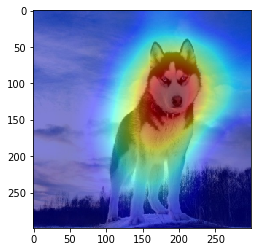

In [108]:
img_init=utils.load_img(im_file,target_size=(299,299))
plt.imshow(overlay(img_init, heatmap))
plt.show()

The red region represents the area of the image on which the network focuses. This result is very nice as main attention is given at the head of the dog.

### Custom Model :

We run the same process over the custom model trained for car crash detection.


The activation of the last FC layer is removed :

In [109]:
#With Custom Model

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'dense_2')
print("Remove Activation from Last Layer")
# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
print("Done. Now Applying changes to the model ...")
model = utils.apply_modifications(model)

Ongoing
Ongoing


We import images from our test-set and compute the activation heatmap for the picture.

In [123]:
im_file="../PICS/val_full/Damaged/DD73.jpg"
im_file="../PICS/test_full/Damaged/D477.jpg"
img1 = image.load_img(im_file,target_size=(250,400))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1, axis=0)
img1 = preprocess_input(img1)
layer_idx = utils.find_layer_idx(model, 'dense_2')
heatmap = visualize_cam(model, layer_idx, filter_indices=0, seed_input=img1[0,:,:,:])

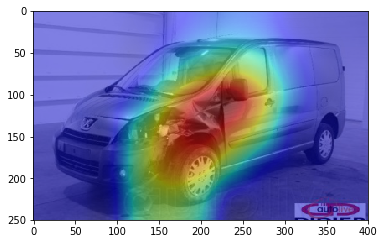

In [124]:
img_init=utils.load_img(im_file,target_size=(250,400))
plt.imshow(overlay(img_init, heatmap))
plt.show()

Here again, we obtain a very nice result, the network focuses on the damaged part of the car.

## Vizualisation of the Early Filters in the Network.

To visualize the filters in the network, we compute the input-image that maximizes the output of the specific filter we want to study. We have to specify the layer index and the filter number.

We first plot the resulting images for the first filters. We focus on the first convolutional layer and pick 3 filters among the 32 present in this layer.

The first layers basically focus on colours as shown below :

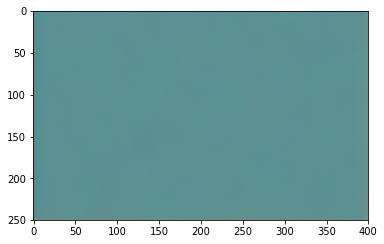

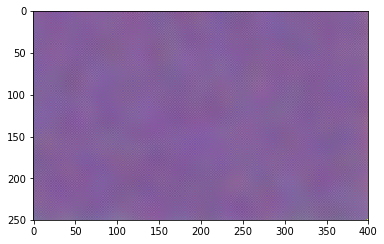

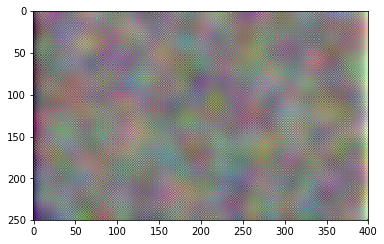

In [125]:
#First Layer Filters (3 among the 32)
layer_name="conv2d_1" #first conv layer
layer_idx = utils.find_layer_idx(model, layer_name)

for filter_idx in [0,10,20]:
    visu=visualize_activation(model,layer_idx,filter_indices=filter_idx)
    plt.imshow(visu)
    plt.show()

Let's now examine filters from upper layers :